# ARMA Models in `statsmodels` - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using statsmodels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)

In [3]:
# Preview the dataset
data.head()

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6


Plot this time series data. 

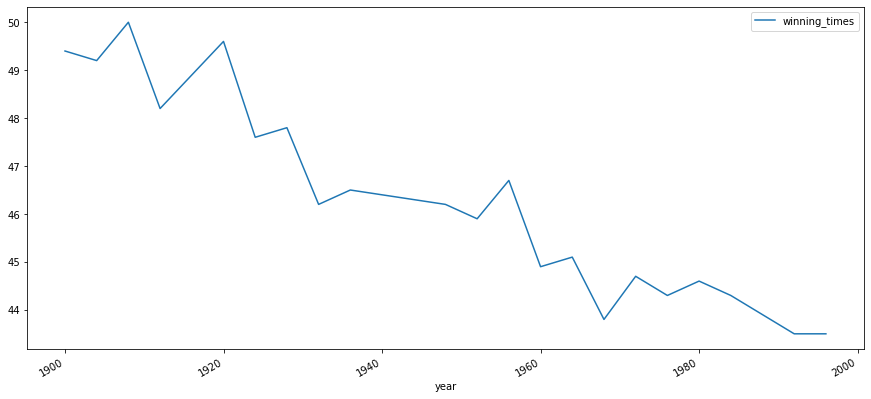

In [30]:
# Plot the time series
data.plot(figsize=(15,7));

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [9]:
# Difference the time series
data_diff = data.diff(periods=1)
data_diff.dropna(inplace=True)

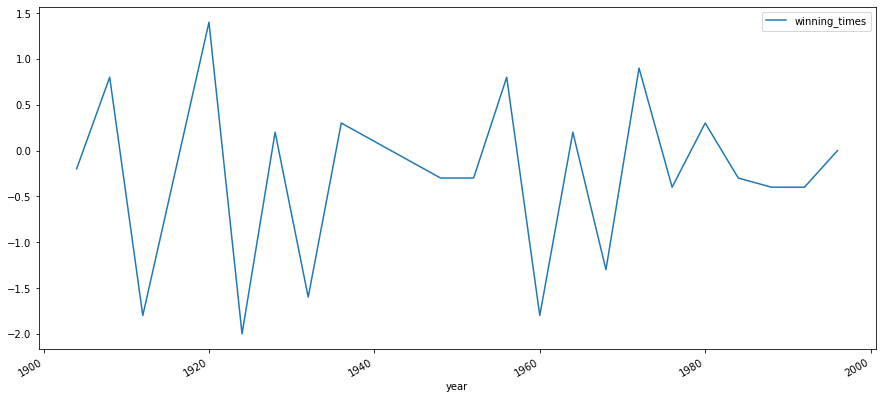

In [31]:
data_diff.plot(figsize=(15,7));

Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

In [15]:
len(data_diff)

21

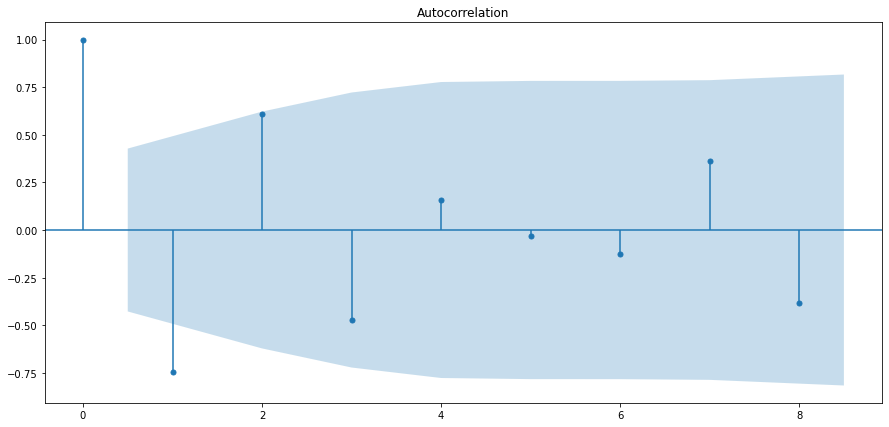

In [27]:
# Plot the ACF
from statsmodels.graphics.tsaplots import (plot_acf, plot_pacf)

fig, ax = plt.subplots(figsize=(15,7))
plot_acf(data_diff, ax=ax, lags=8);

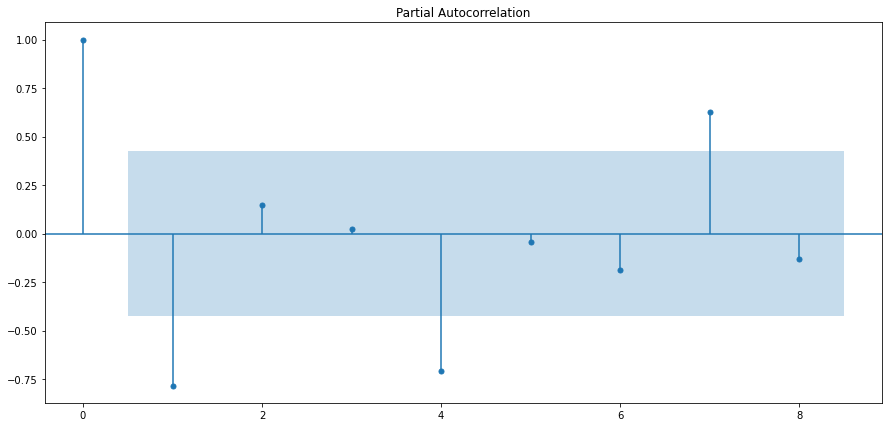

In [26]:
# Plot the PACF
fig, ax = plt.subplots(figsize=(15,7))
plot_pacf(data_diff, ax=ax, lags=8);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [29]:
# import the model
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
import seaborn as sns

In [50]:
# generate a list of orders that I'd like to test
orders = [(1,0), (0,1), (1,1), (2,1), (1,2), (2,0), (0,2), (2,2),
          (3,1), (1,3), (3,2), (2,3), (3,3)]
AICs = []
BICs = []

for order in orders:
    # instantiate the model
    mod_arma = ARMA(data_diff, order=order)
    
    # fit the model to data
    res_arma = mod_arma.fit()
    AICs.append(res_arma.aic)
    BICs.append(res_arma.bic)

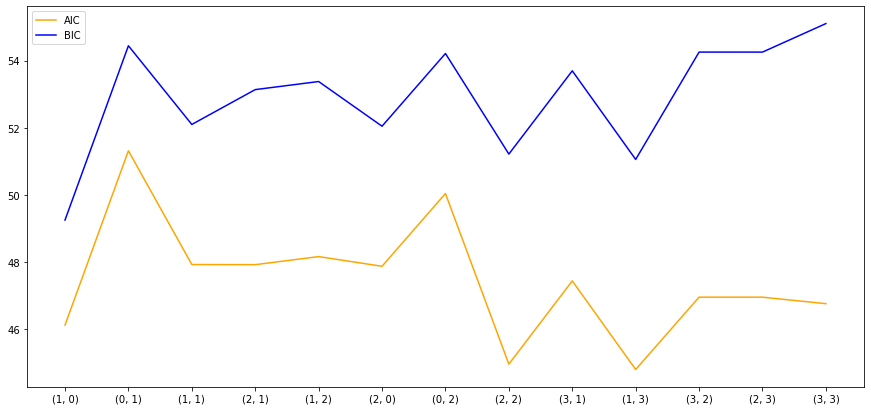

In [51]:
fig, ax = plt.subplots(figsize=(15,7))

sns.lineplot(x=[str(x) for x in orders], y=AICs, 
             color='orange', label='AIC', ax=ax)

sns.lineplot(x=[str(x) for x in orders], y=BICs, 
             color='blue', label='BIC', ax=ax);

## What is your final model? Why did you pick this model?

In [ ]:
# It appears that we achieve lower AIC and BIC scores using order = (1,3) or (2,2), 
# or even (1,0) seems pretty good as well (it even has lower BIC score than the other
# two)

### ARMA(1, 3)

In [57]:
# Fit a first order MA model to the data
mod_arma = ARMA(data_diff, order=(1, 3))

# fit the model to data
res_arma = mod_arma.fit()

print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 3)   Log Likelihood                 -16.392
Method:                       css-mle   S.D. of innovations              0.452
Date:                Mon, 31 May 2021   AIC                             44.783
Time:                        16:42:39   BIC                             51.050
Sample:                             0   HQIC                            46.143
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3050      0.031     -9.972      0.000      -0.365      -0.245
ar.L1.winning_times     0.1102      0.274      0.402      0.688      -0.427       0.648
ma.L1.winning_ti

In [56]:
# So far, the p-value for ar.L1.winning_times or the Autoregressive term with 
# the lag of 1 seem to not be statistically significant. 

### ARMA(2, 2)

In [58]:
# Fit a first order MA model to the data
mod_arma = ARMA(data_diff, order=(2,2))

# fit the model to data
res_arma = mod_arma.fit()

print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Mon, 31 May 2021   AIC                             44.943
Time:                        16:42:43   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.005      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.069      0.000      -1.948      -1.567
ar.L2.winning_ti

In [59]:
# All the coefficients in ARMA(2, 2) have p-values smaller than 0.05, which means
# they're all statistically significant. Which means this model is probably more 
# reliable than the (1, 3) above.

### ARMA(1, 0)

In [60]:
# Fit a first order MA model to the data
mod_arma = ARMA(data_diff, order=(1,0))

# fit the model to data
res_arma = mod_arma.fit()

print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Mon, 31 May 2021   AIC                             46.107
Time:                        16:44:49   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.000      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                

In [61]:
# All the coefficients are statistically significantl.
# And since it's generally encouraged to select with models with fewer parameters 
# I think I would go with this one

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 